In [14]:
# import the related module abs
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
#loading the saved model for use
model1 = load_model('weightmodel1.h5')

C:\Users\sslindia\Anaconda3\lib\site-packages\keras\engine\saving.py:269: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [2]:
# creating the list of category for maping the result 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [15]:
# open the system camera for click the image 

import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come her

    # Display the resulting frame
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
#resize_img = cv2.resize(img  , (28 , 28))        
cv2.imwrite('image.jpg', frame)
cap.release()
cv2.destroyAllWindows()

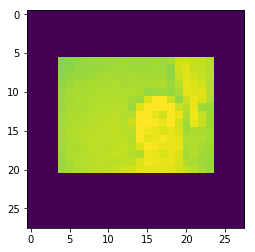

In [16]:
# changing the image shape to the MNIST data set 

from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt

def imageprepare(argv):
    """
    This function returns the pixel values.
    The imput is a png file location.
    """
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels

    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (4, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Heigth becomes 20 pixels.
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        newImage.paste(img, (wleft, 4))  # paste resized image on white canvas

    # newImage.save("sample.png

    tv = list(newImage.getdata())  # get pixel values

    # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    tva = [(255 - x) * 1.0 / 255.0 for x in tv]
 
    return tva

x=imageprepare('image.jpg')#file path here
myarray = np.asarray(x)

myarray=myarray.reshape(28,28)
myarray
plt.imshow(myarray)
# mnist IMAGES are 28x28=784 pixels

In [17]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [18]:
x = np.expand_dims(myarray, axis=0)

In [19]:
predictions = model1.predict(x)

In [20]:
predictions[0]

array([6.9826976e-03, 8.5267516e-07, 4.2997904e-02, 2.1750382e-05,
       2.1752760e-02, 1.3011574e-05, 2.8760733e-02, 2.1848300e-05,
       8.9944845e-01, 2.9030280e-08], dtype=float32)

In [21]:
predicted_label = np.argmax(predictions[0])
class_names[predicted_label]

'Bag'